In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance
import seaborn as sns
 
import warnings 
warnings.filterwarnings("ignore")

In [37]:
portfolio = ['^NSEI','IOLCP.NS','BAJAJFINSV.NS','BANDHANBNK.NS','INDUSINDBK.NS','RELAXO.NS','IEX.NS','NMDC.NS','PARAGMILK.NS',
            'KRBL.NS','STRTECH.NS','VIRINCHI.BO', 'MEGH.NS','HSCL.NS','MANORG.BO','ZENSARTECH.NS','MAITHANALL.NS','DEEPIND.NS',
            'TECHM.NS', 'ORIENTCEM.NS']
name = ['Nifty50','IOLCP','Bajaj Finserv','Bandhan Bank','Indusind Bank','Relaxo','IEX','NMDC','Parag','KRBL','Sterlite',
       'Virinchi','Meghamani','HSCL','Mangalam','Zensar','Maithan Alloys','Deep Industries','Tech Mahindra','Orient Cements']

[*********************100%***********************]  20 of 20 completed


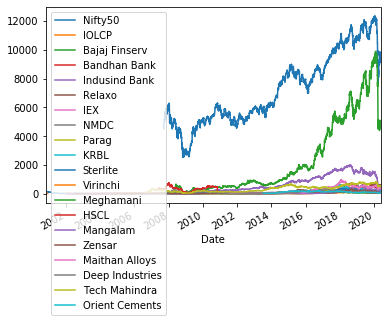

In [40]:
portfolio_data = yfinance.download (portfolio , start = "1994-01-07", end = "2020-05-15", interval = "1d", 
                                group_by = 'ticker', auto_adjust = True, treads = True)
stock_data = pd.DataFrame()
for i in range(0,len(portfolio)):
    stock_data[name[i]] = portfolio_data[portfolio[i],'Close']

stock_data.plot()

,Nifty50,IOLCP,Bajaj Finserv,Bandhan Bank,Indusind Bank,Relaxo,IEX,NMDC,Parag,KRBL,Sterlite,Virinchi,Meghamani,HSCL,Mangalam,Zensar,Maithan Alloys,Deep Industries,Tech Mahindra,Orient Cements
count,3106.000000,2338.000000,2937.000000,519.000000,4411.000000,2186.000000,626.000000,2.990000e+03,979.000000,4520.000000,4800.000000,4830.000000,3162.000000,3242.000000,4533.000000,4411.000000,2174.000000,2507.000000,3368.000000,1676.000000
mean,0.000333,0.001472,0.001098,-0.000397,0.001244,0.002111,0.000408,-6.888649e-07,-0.000606,0.003063,0.000634,0.001538,0.000858,0.000489,0.002424,0.001658,0.001426,0.000426,0.000803,0.000202
std,0.014468,0.035701,0.025180,0.040880,0.030536,0.025000,0.021934,2.674412e-02,0.028708,0.063983,0.037457,0.051561,0.034561,0.039048,0.051607,0.034307,0.033981,0.034730,0.025289,0.026975
min,-0.129805,-0.199873,-0.258621,-0.250216,-0.237276,-0.146957,-0.118823,-1.326835e-01,-0.193853,-0.200000,-0.314678,-0.765217,-0.199144,-0.895092,-0.199964,-0.489872,-0.200000,-0.199775,-0.154680,-0.186544
25%,-0.005878,-0.015361,-0.010770,-0.018572,-0.013013,-0.010136,-0.007889,-1.295793e-02,-0.014086,-0.015424,-0.018775,-0.022106,-0.017592,-0.017341,-0.023207,-0.012918,-0.015642,-0.018030,-0.011381,-0.014931
50%,0.000394,0.000000,0.000025,-0.001445,0.000054,0.000324,-0.000329,-5.997490e-04,-0.001561,0.000000,-0.001642,0.000000,-0.002361,-0.001854,0.000000,-0.000586,0.000000,-0.002556,0.000421,-0.001294
75%,0.006576,0.015866,0.012086,0.013875,0.014423,0.012235,0.007403,1.190269e-02,0.012388,0.016283,0.017763,0.020553,0.014593,0.014828,0.024762,0.012453,0.015010,0.013658,0.011902,0.012434
max,0.177441,0.200000,0.200069,0.393215,0.446731,0.199921,0.166160,2.002387e-01,0.174932,3.190001,0.426756,0.215278,0.209876,0.213722,0.210219,0.901429,0.199966,0.200707,0.256120,0.172623


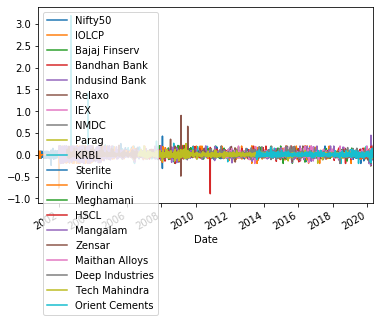

In [41]:
portfolio_returns = stock_data.pct_change()
portfolio_returns.plot()
portfolio_returns.describe()

In [78]:
excess_returns = pd.DataFrame()
for i in range(1,len(portfolio)):
    excess_returns[name[i]] = portfolio_returns[name[i]].sub(portfolio_returns[name[0]], axis= 0)

#excess_returns.plot(subplots= True)
#excess_returns.describe()
avg_excess_return = excess_returns.mean()
sd_excess_return = excess_returns.std()

daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)
annual_factor = []
for i in range(0,len(portfolio)-1):
    annual_factor.append(round(np.sqrt(excess_returns[name[i+1]].count()),3))
                            
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
print(annual_sharpe_ratio)
#annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)



IOLCP              1.714909
Bajaj Finserv      1.843338
Bandhan Bank      -0.187403
Indusind Bank      1.747616
Relaxo             3.412436
IEX                0.541590
NMDC              -0.707344
Parag             -1.004193
KRBL               2.563321
Sterlite           1.121767
Virinchi           0.681120
Meghamani          0.972810
HSCL               0.157101
Mangalam           2.187841
Zensar             2.140910
Maithan Alloys     1.630736
Deep Industries    0.203763
Tech Mahindra      0.565930
Orient Cements    -0.182403
dtype: float64


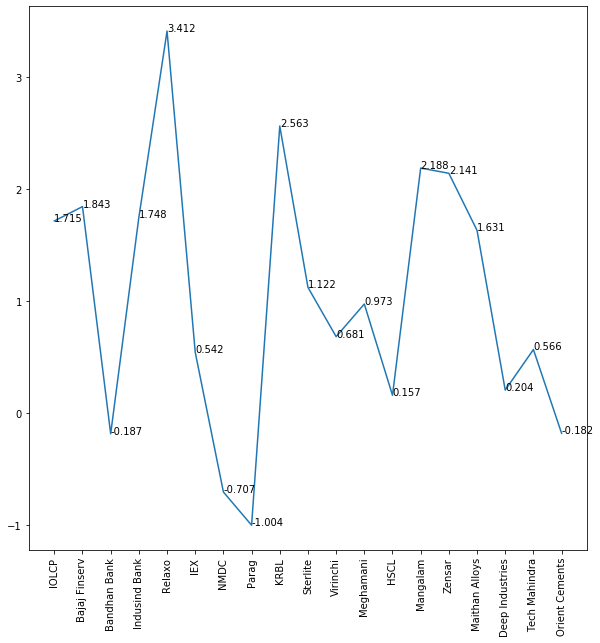

In [79]:
fig= plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
for i,j in zip(name[1:],annual_sharpe_ratio.round(3)):
    plt.annotate(str(j),xy=(i,j))

plt.plot(name[1:],annual_sharpe_ratio)

In [88]:
portfolio_log_returns = pd.DataFrame()
for i in range(1,len(portfolio)):
    portfolio_log_returns[name[i]] = np.log(stock_data[name[i]]/(stock_data[name[i]].shift(1)))
portfolio_log_returns.describe()

,IOLCP,Bajaj Finserv,Bandhan Bank,Indusind Bank,Relaxo,IEX,NMDC,Parag,KRBL,Sterlite,Virinchi,Meghamani,HSCL,Mangalam,Zensar,Maithan Alloys,Deep Industries,Tech Mahindra,Orient Cements
count,2330.000000,2929.000000,519.000000,4411.000000,2186.000000,626.000000,2988.000000,979.000000,4309.000000,4786.000000,4195.000000,3160.000000,3240.000000,4323.000000,4397.000000,2158.000000,2507.000000,3366.000000,1676.000000
mean,0.000842,0.000758,-0.001216,0.000782,0.001803,0.000170,-0.000347,-0.001021,0.001903,-0.000046,0.000880,0.000249,-0.000551,0.001223,0.001099,0.000906,-0.000164,0.000483,-0.000159
std,0.035564,0.025310,0.040422,0.030334,0.024609,0.021791,0.026548,0.028837,0.044759,0.037343,0.049348,0.034068,0.053008,0.050601,0.032719,0.033671,0.034202,0.025159,0.026868
min,-0.222985,-0.299244,-0.287970,-0.270858,-0.158946,-0.126497,-0.142351,-0.215489,-0.223143,-0.377866,-0.222013,-0.222074,-2.254669,-0.223099,-0.673094,-0.223143,-0.222863,-0.168040,-0.206464
25%,-0.015480,-0.010847,-0.018747,-0.013099,-0.010188,-0.007920,-0.013037,-0.014187,-0.015909,-0.018954,-0.025307,-0.017752,-0.017493,-0.024198,-0.013019,-0.015803,-0.018194,-0.011461,-0.015044
50%,0.000000,0.000038,-0.001446,0.000054,0.000324,-0.000329,-0.000600,-0.001562,-0.000431,-0.001677,-0.001701,-0.002366,-0.001856,0.000000,-0.000612,0.000000,-0.002559,0.000421,-0.001295
75%,0.015742,0.012013,0.013780,0.014320,0.012161,0.007376,0.011846,0.012312,0.017184,0.017678,0.024957,0.014477,0.014733,0.025444,0.012376,0.015028,0.013565,0.011833,0.012357
max,0.182322,0.182379,0.331614,0.369306,0.182256,0.153716,0.182520,0.161211,1.432701,0.355403,0.194973,0.190518,0.193692,0.190801,0.642606,0.182293,0.182911,0.228028,0.159243


In [89]:
portfolio_log_returns.cov()

,IOLCP,Bajaj Finserv,Bandhan Bank,Indusind Bank,Relaxo,IEX,NMDC,Parag,KRBL,Sterlite,Virinchi,Meghamani,HSCL,Mangalam,Zensar,Maithan Alloys,Deep Industries,Tech Mahindra,Orient Cements
IOLCP,0.001265,0.000106,0.000208,0.000131,0.000058,0.000135,0.000124,0.000244,0.000150,0.000211,0.000180,0.000233,0.000217,0.000227,0.000093,0.000168,0.000219,0.000063,0.000168
Bajaj Finserv,0.000106,0.000641,0.000521,0.000239,0.000088,0.000120,0.000179,0.000207,0.000189,0.000243,0.000210,0.000193,0.000206,0.000158,0.000134,0.000157,0.000174,0.000152,0.000208
Bandhan Bank,0.000208,0.000521,0.001634,0.000832,0.000300,0.000152,0.000357,0.000335,0.000420,0.000319,0.000489,0.000329,0.000367,0.000137,0.000268,0.000348,0.000345,0.000214,0.000492
Indusind Bank,0.000131,0.000239,0.000832,0.000920,0.000116,0.000140,0.000261,0.000252,0.000278,0.000434,0.000318,0.000276,0.000252,0.000249,0.000225,0.000173,0.000193,0.000228,0.000224
Relaxo,0.000058,0.000088,0.000300,0.000116,0.000606,0.000070,0.000107,0.000107,0.000109,0.000127,0.000125,0.000125,0.000086,0.000095,0.000068,0.000098,0.000109,0.000062,0.000107
IEX,0.000135,0.000120,0.000152,0.000140,0.000070,0.000475,0.000154,0.000137,0.000155,0.000152,0.000171,0.000144,0.000157,0.000083,0.000096,0.000120,0.000134,0.000057,0.000165
NMDC,0.000124,0.000179,0.000357,0.000261,0.000107,0.000154,0.000705,0.000268,0.000246,0.000323,0.000225,0.000274,0.000244,0.000172,0.000164,0.000170,0.000199,0.000173,0.000200
Parag,0.000244,0.000207,0.000335,0.000252,0.000107,0.000137,0.000268,0.000832,0.000259,0.000325,0.000319,0.000245,0.000289,0.000315,0.000141,0.000317,0.000251,0.000083,0.000279
KRBL,0.000150,0.000189,0.000420,0.000278,0.000109,0.000155,0.000246,0.000259,0.002003,0.000381,0.000363,0.000313,0.000262,0.000236,0.000249,0.000210,0.000276,0.000180,0.000171
Sterlite,0.000211,0.000243,0.000319,0.000434,0.000127,0.000152,0.000323,0.000325,0.000381,0.001394,0.000386,0.000390,0.000352,0.000317,0.000318,0.000245,0.000316,0.000235,0.000273


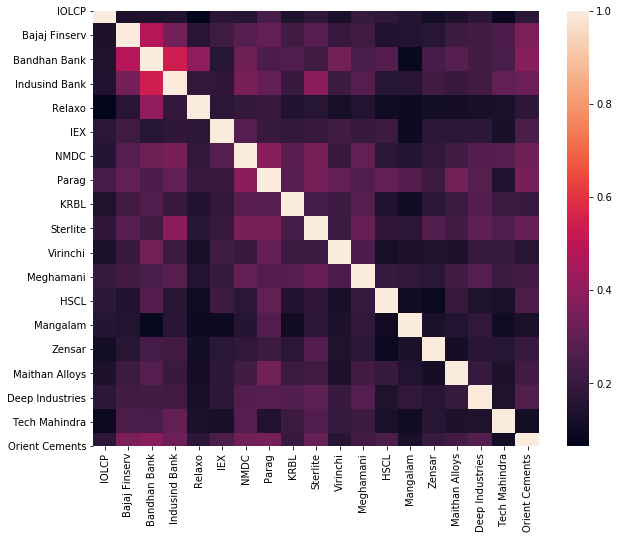

In [102]:
figure = plt.figure(figsize= (10,8))
sns.heatmap(portfolio_log_returns.corr())
plt.show()

In [103]:
num_assets = len(portfolio)-1
weights = np.random.random(num_assets)
weights /= np.sum(weights)

0.9999999999999998

In [104]:
np.sum(weights*portfolio_log_returns.mean())*250

0.07219868472098097

In [107]:
np.dot(weights.T, np.dot((portfolio_log_returns.cov()*250),weights))

0.0697534022767675

In [108]:
np.sqrt(np.dot(weights.T, np.dot((portfolio_log_returns.cov()*250),weights)))

0.26410869405751775

In [110]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*portfolio_log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot((portfolio_log_returns.cov()*250),weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [117]:
pfolio_returns.max()

0.1899533336022524